**Hoja de Trabajo #8** <br>
***RNA*** <br>
Diego Ruiz 18761, Jose Jorge Perez 18364

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, learning_curve
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
import seaborn as sb
import random
import graphviz
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import svm
import statsmodels.api as sm
import cProfile
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import make_pipeline


%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

1. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.

In [49]:
datos = pd.read_csv("train.csv", encoding="latin1")

2. Seleccione como variable respuesta la que creó con las categorías del precio de la casa.

In [50]:
numericas = datos.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]

numericas["Clase"] = pd.cut(numericas["SalePrice"], bins=[0, limite_economicas, limite_caras, float("inf")], labels=["Económicas", "Intermedias", "Caras"])
print(numericas)

      LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF

In [51]:
dummies = pd.get_dummies(numericas['Clase'])
datos = pd.concat([numericas,dummies], axis=1)
dummies.head()

,Económicas,Intermedias,Caras
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [52]:
economica = datos.pop("Económicas") 
intermedias = datos.pop("Intermedias")
caras = datos.pop("Caras")
datos.pop("Clase")

0             Caras
1       Intermedias
2             Caras
3       Intermedias
4             Caras
           ...     
1455    Intermedias
1456          Caras
1457          Caras
1458    Intermedias
1459    Intermedias
Name: Clase, Length: 1460, dtype: category
Categories (3, object): ['Económicas' < 'Intermedias' < 'Caras']

In [53]:
numericastmp = numericas.dropna()
Y = numericastmp.pop("Clase")
X = numericastmp

X_train, X_test,y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

3. Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable
respuesta que categoriza las casas en baratas, medias y caras. Estos modelos deben tener
diferentes topologías y funciones de activación. <br>
4. Use los modelos para predecir el valor de la variable respuesta. <br>
5. Haga las matrices de confusión respectivas.

In [54]:
%%time
model1 = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', random_state=42)
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
y_pred
cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Confussion Matrix
[[120   0   7]
 [  0 120   4]
 [  3  12  93]] 

Accuracy: 0.9275766016713092
Precission: 0.9281521861520503
Recall:  0.9275766016713092
F1 Score:  0.9273668996688915
CPU times: total: 344 ms
Wall time: 1.29 s


C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
%%time
model2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='logistic', solver='adam', random_state=42)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
y_pred
cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

Confussion Matrix
[[125   0   2]
 [  0 123   1]
 [  4   6  98]] 

Accuracy: 0.9637883008356546
Precission: 0.9640296736805894
Recall:  0.9637883008356546
F1 Score:  0.963439844320869
CPU times: total: 594 ms
Wall time: 2.93 s


C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


6. Compare los resultados obtenidos con los diferentes modelos de clasificación usando redes
neuronales en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el
algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los
errores).

El primer modelo basado en la funcion de activacion relu, es un poco menos preciso, contando con un un poco menos de accuracy que su contraparte basado en logistic. No obstante, es mucho mas rapido para encontrar estos resultados, a pesar de equivocarse mas en todas las clasificaciones. La importancia de estos errores se vuelve grande cuando tomamos en cuenta que el tiempo del segundo modelo no es malo, a pesar de ser considerablemente mayor que el primero.

7. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


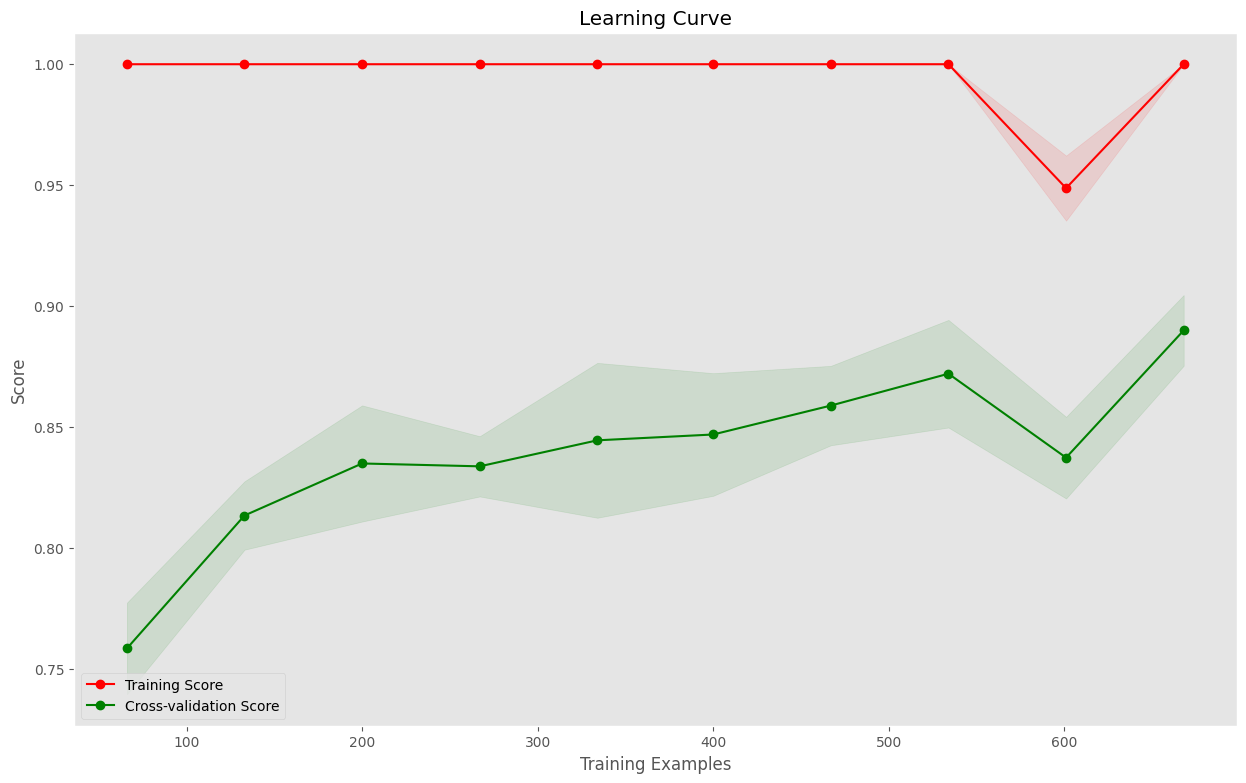

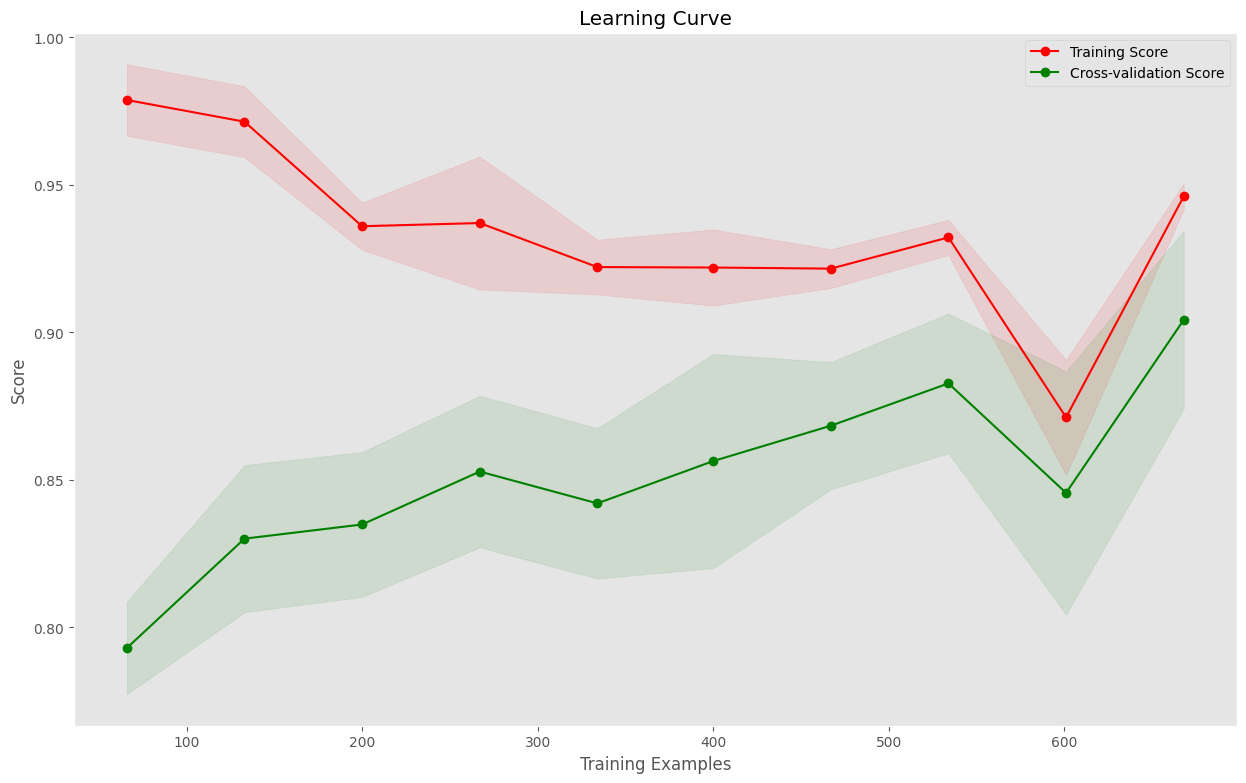

In [56]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X_train, y_train, X_test, y_test):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")

    plt.legend(loc="best")

# Plot learning curves for both models
plot_learning_curve(model1, X_train, y_train, X_test, y_test)
plot_learning_curve(model2, X_train, y_train, X_test, y_test)

plt.show()


Como se puede observar, el modelo no sufre de overfitting.

8. Para el modelo elegido de clasificación tunee los parámetros y discuta si puede mejorar
todavía el modelo sin llegar a sobre ajustarlo.

In [57]:
datos2 = pd.read_csv("train.csv", encoding="latin1")
numericas2 = datos2.select_dtypes(include='number')
numericas2 = numericas2.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

target = numericas2.pop("SalePrice")
print(target)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [58]:
selector_numericas = make_column_selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = make_column_selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(datos2)
categoricas = selector_categoricas(datos2)
#veamos que tan bien separó las variables
print("Numéricas: ",numericas)
print("Categóricas: ", categoricas)

preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

Numéricas:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categóricas:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTy

Es posible mejorar un poco el modelo sin necesariamente caer en overfitting con el tuneo de los datos.

9. Seleccione ahora el SalesPrice como variable respuesta.

In [59]:
datos9 = pd.read_csv("train.csv")

numericas = datos.select_dtypes(include='number')
numericas = numericas.dropna()

X = numericas.drop('SalePrice', axis=1)
y = numericas["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(836, 26)
(359, 26)
(836,)
(359,)


10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y
funciones de activación para predecir el precio de las casas.

In [60]:

model3 = MLPRegressor(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', random_state=42)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)

print("RMSE:", ((metrics.mean_squared_error(y_test, y_pred))**0.5))
print("R2:", (metrics.r2_score(y_test, y_pred)))

RMSE: 45063.747447795395
R2: 0.6823978365741639


C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [61]:
model4 = MLPRegressor(hidden_layer_sizes=(128, 64), activation='tanh', solver='adam', random_state=42)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)

print("RMSE:", ((metrics.mean_squared_error(y_test, y_pred))**0.5))
print("R2:", (metrics.r2_score(y_test, y_pred)))

RMSE: 197299.5693987433
R2: -5.0880907615757485


C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


11. Compare los dos modelos de regresión y determine cuál funcionó mejor para predecir el
precio de las casas.

El modelo de regresion con activacion relu es el unico que es decente para crear una regresion para la variable SalePrice, todos los demas muestran un R2 negativo, lo cual indica un rendimiento pesimo. El 0.66 del relu no es tan bueno pero es el resultado mas decente encontrado.

12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


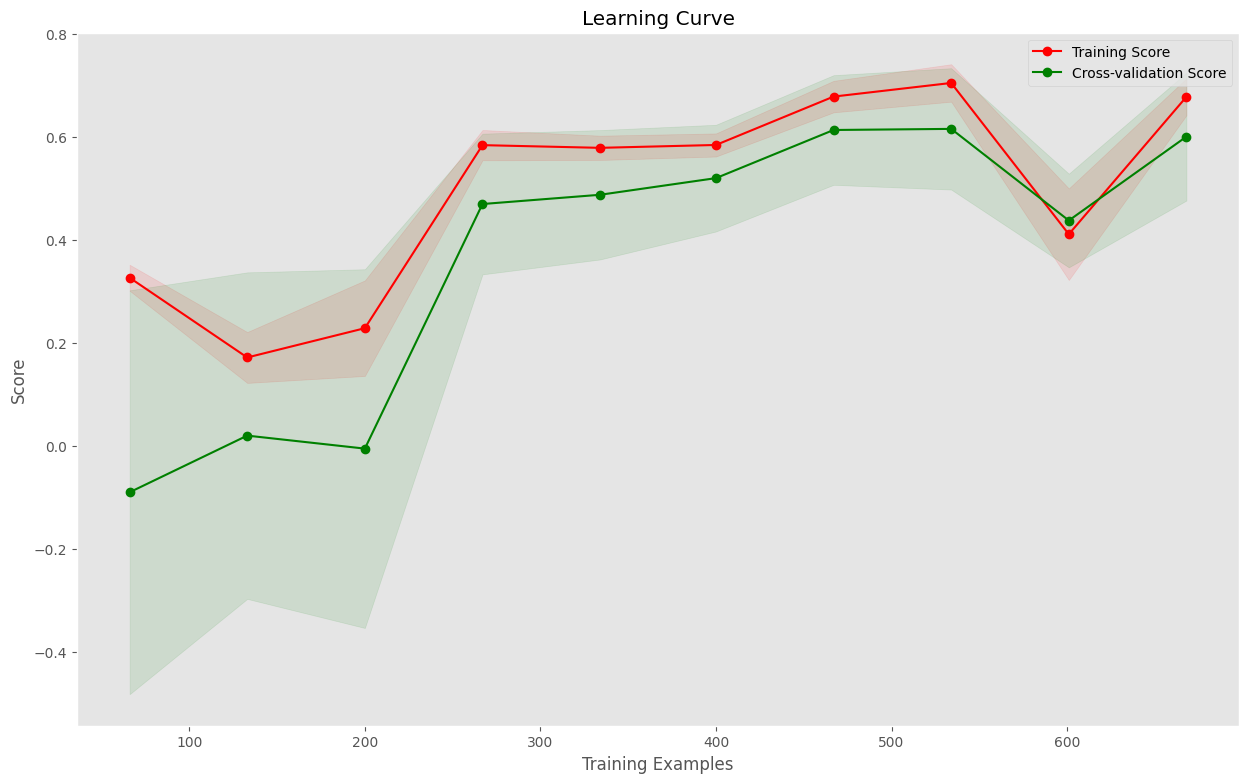

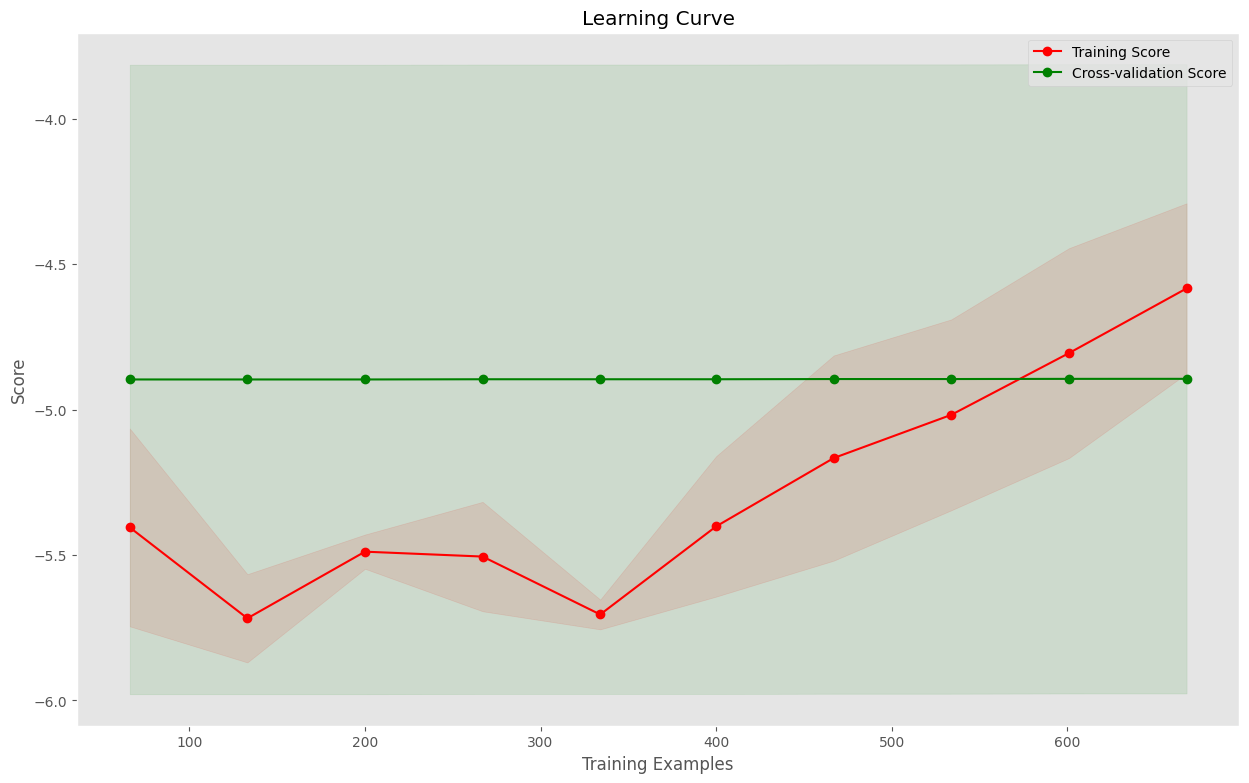

In [62]:
plot_learning_curve(model3, X_train, y_train, X_test, y_test)
plot_learning_curve(model4, X_train, y_train, X_test, y_test)

plt.show()

El primer modelo muestra un desempeño parecido entre su etapa de entrenamiento y en su cross validation mientras que el segundo modelo muestra claramente que sufre de overfitting y que la etapa de cross validation se mantiene constante en un error.

13. Para el modelo elegido de regresión tunee los parámetros y discuta si puede mejorar
todavía el modelo sin llegar a sobre ajustarlo.

In [63]:
selector_numericas = make_column_selector(dtype_exclude=object) #Seleccionamos todas las variables que no son Object
selector_categoricas = make_column_selector(dtype_include=object) #Seleccionamos todas las varibles de tipo object
#Seleccionamos las columnas que cumplen con los selectores pasándole los datos
numericas = selector_numericas(datos2)
categoricas = selector_categoricas(datos2)
#veamos que tan bien separó las variables
print("Numéricas: ",numericas)
print("Categóricas: ", categoricas)

preprocesador_categorico = OneHotEncoder(handle_unknown="ignore")
preprocesador_numerico = StandardScaler()

preprocesador = ColumnTransformer([
    ('one_hot_encoder',preprocesador_categorico,categoricas),
    ('standard_scaler',preprocesador_numerico, numericas)
])

Numéricas:  ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categóricas:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTy

En este caso, no es posible mejorar los resultados con esta tecnica debido a que los modelos son bastante pobres en su naturaleza.

14. Compare la eficiencia del mejor modelo de RNA con los resultados obtenidos con los
algoritmos de las hojas de trabajo anteriores. ¿Cuál es mejor para predecir? ¿Cuál se
demoró más en procesar?

El modelo con mayor precision fue el de SVC, ya que obtuvo resultados perfectos, pero esto no necesariamente significa que sea el mejor para predecir, lo unico que podemos asegurar es que se desempeña bien con el dataset que hemos estado trabajando. El modelo que es mas rapido para procesar es posiblemente el Logistic Regression.

15. Compare los resultados del mejor modelo de esta hoja para clasificar con los resultados de
los algoritmos usados para clasificar de las hojas de trabajo anteriores.

El algoritmo de MLPClassifier utilizado con activacion logistic fue el que mejor se desempeño, mostrando gran velocidad y un accuracy muy alto. Comparado con las hojas anteriores es posiblemente el que mejor se ha desempeñado en accuracy, y no se considera lento para no poder considerarlo como una buena opcion a pesar de que hay algoritmos que son mas rapidos.

16. Compare los resultados del mejor modelo para predecir el precio de venta con los
resultados de los algoritmos usados para el mismo propósito de las hojas de trabajo
anteriores.

Para predecir el precio de venta, los algoritmos de esta hoja fueron malos en general, no se comparan con los algoritmos de hojas anteriores ya que en esas, se encontraban regresiones bastante buenas y con tiempo de ejecucion bajos.

17. Ahora que ha usado todos los modelos que hemos visto y aplicados al conjunto de datos
llegue a conclusiones sobre cual es o cuales son los mejores modelos para clasificar dadas
las características del conjunto de datos. ¿Cuál o cuáles son los mejores para predecir el
precio de las casas? Una tabla de resumen con las métricas de los modelos le puede resultar
muy útil para esto.

Los mejores modelos para clasificar han sido, SVC y los de la hoja actual de MLPClassifier. Para predecir la variable SalePrice, los mejores modelos han sido los de regresión lineal, y regresion logistica. Algo sorprendente es que casi ninguno de los modelos utilizados sufren de demasiado overfitting.

18. Genere un informe de los resultados y las explicaciones.